Comcast Telecom Consumer Complaints

DESCRIPTION


Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.



Data Dictionary

Ticket #: Ticket number assigned to each complaint

Customer Complaint: Description of complaint

Date: Date of complaint

Time: Time of complaint

Received Via: Mode of communication of the complaint

City: Customer city

State: Customer state

Zipcode: Customer zip

Status: Status of complaint

Filing on behalf of someone




Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [101]:
# Importing libraries
import pandas as pd
import numpy as np

Task.1 Importing data into Python environment.

In [102]:
# Reading dataset and assigning it as data
data = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [103]:
# Checking column names
data.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [104]:
#Correcting column names and replacing space with "_"
data.rename(columns = {'Ticket #' : 'Ticket_No'}, inplace = True)
data.columns = data.columns.str.replace(" ", "_") # replacing space with "_"
data.head(3)

,Ticket_No,Customer_Complaint,Date,Date_month_year,Time,Received_Via,City,State,Zip_code,Status,Filing_on_Behalf_of_Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes


In [105]:
# checking data shape
data.shape

(2224, 11)

In [106]:
#Checking missing values in dataset for respective columns
data.isnull().sum()

Ticket_No                      0
Customer_Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received_Via                   0
City                           0
State                          0
Zip_code                       0
Status                         0
Filing_on_Behalf_of_Someone    0
dtype: int64

from above output it is observed that dataset has no missing values

In [107]:
# Checking data types
data.dtypes

Ticket_No                      object
Customer_Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received_Via                   object
City                           object
State                          object
Zip_code                        int64
Status                         object
Filing_on_Behalf_of_Someone    object
dtype: object

from above output it can be observed, Date and Date_month_year has type object

In [108]:
# converting Date and Date_month_year column from object type to datetime
data["Date"] = pd.to_datetime(data.Date.astype(str), format = "%d-%m-%y")
data["Date_month_year"] = pd.to_datetime(data.Date_month_year)

In [109]:
# Checking data type again
data.dtypes

Ticket_No                              object
Customer_Complaint                     object
Date                           datetime64[ns]
Date_month_year                datetime64[ns]
Time                                   object
Received_Via                           object
City                                   object
State                                  object
Zip_code                                int64
Status                                 object
Filing_on_Behalf_of_Someone            object
dtype: object

Date and Date_month_year column are now changed to type datetime

Now, that we are done with all basic data checks lets perform analysis task

Task.2 Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [110]:
# Month wise complaints
data["Month"] = data.Date.dt.month # Adding Month column to dataset 
month_wise_tickets = data.groupby("Month").Ticket_No.agg(["count"]) #Extracting monthwise ticket counts
month_wise_tickets.reset_index(inplace=True) # Resetting index (converting date index to column)
month_wise_tickets.head()

,Month,count
0,1,55
1,2,59
2,3,45
3,4,375
4,5,317


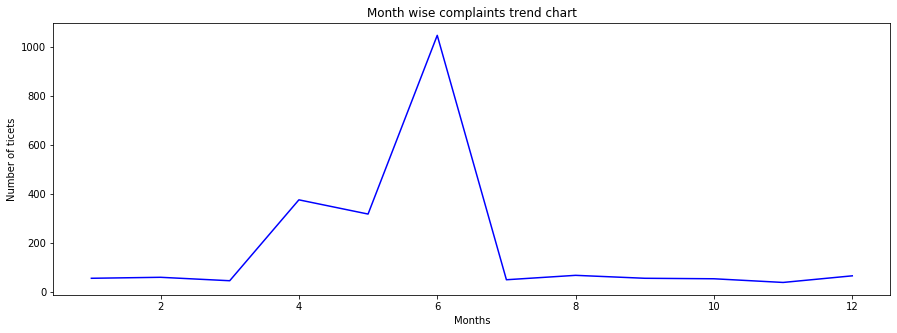

In [111]:
# Month wise complaints trend chart
import matplotlib.pyplot as plt

plt.figure(figsize = (15,5)) # increasing plot size
plt.plot(month_wise_tickets['Month'],month_wise_tickets['count'],color='blue') #defining x, y for plot
plt.title("Month wise complaints trend chart") #plot title
plt.xlabel('Months') # plot x_label
plt.ylabel("Number of ticets") # plot y_label
plt.show()

In [112]:
# Daily complaints
daily_tickets = data.groupby("Date").Ticket_No.agg(["count"]) # Extracting day wise ticket counts
daily_tickets.reset_index(inplace=True) # Resetting index (converting date index to column)
daily_tickets.head()

,Date,count
0,2015-01-04,18
1,2015-01-05,12
2,2015-01-06,25
3,2015-02-04,27
4,2015-02-05,7


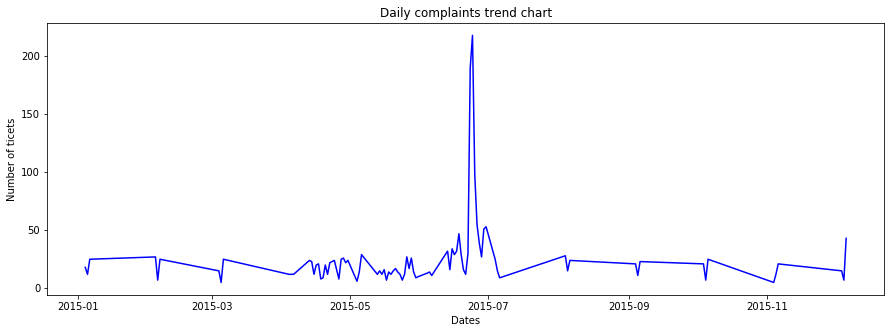

In [113]:
# Daily complaints trend chart
plt.figure(figsize = (15,5)) # increasing plot size
plt.plot(daily_tickets['Date'],daily_tickets['count'],color='blue') #defining x, y for plot
plt.title("Daily complaints trend chart") #plot title
plt.xlabel('Dates') # plot x_label
plt.ylabel("Number of ticets",) # plot y_label
plt.show()

Task.3 Provide a table with the frequency of complaint types. 

In [114]:
# installing wordcloud and gensim
#!pip install wordcloud
#!pip install gensim

In [115]:
# Importing libraries
import nltk.corpus
# Importing stopwords
from nltk.corpus import stopwords
# Importing word limmatizer
from nltk.stem.wordnet import WordNetLemmatizer
# Importing string
import string

In [116]:
stop = set(stopwords.words("english")) # to remove stop words from english
exclude = set(string.punctuation) # to remove punctuations (. ,)
lemma = WordNetLemmatizer() # to keep only core word of words i.e, limit from limitizer

In [117]:
# defining a function for cleaning the document
def clean(doc):
    
    # stopwords_free_sentence = lowering the str in doc and then splitting in to list 
    # and joining them back to form sentence excluding stop words.
    stopwords_free_sentence = " ".join([i for i in doc.lower().split() if i not in stop])
    
    # punctuation free = now the characters that are not in "exclude", 
    # iterating "stopwords_free_sentence" list and joining them back to 
    # form sentence making it punctaution free.
    punc_free_sentence = "".join([ch for ch in stopwords_free_sentence if ch not in exclude])
    
    # for each word in " punc_free_sentence", splitting them and iterating over lemmatizer to 
    # select only core words and then joining them back
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free_sentence.split())
    
    return normalised

In [118]:
# conveting series to list
doc_full = data["Customer_Complaint"].tolist()

# applying function to list doc_full and keeping it as a list by using .split
doc_clean = [clean(doc).split() for doc in doc_full]

In [119]:
import gensim
from gensim import corpora

# Creating a dictionary
dictionary = corpora.Dictionary(doc_clean)

In [120]:
# creating a document term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

Document term matrix

Doc List = ["Comcast Cable Intnet Speed", .....,]


Doc index = [0,1,2,3]


doc term matrix =[(0,1), (1,1), (2,1), (3,1),...]

0 - IDX

1 - frequency

In [121]:
from gensim.models import LdaModel

# Topic modeling
Num_Topic = 5
ldamodel = LdaModel(doc_term_matrix, num_topics= Num_Topic, id2word= dictionary, passes= 15)

In [122]:
# Extracting topics from model
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.139*"billing" + 0.129*"comcast" + 0.058*"issue" + 0.038*"practice" + 0.035*"service" + 0.033*"unfair" + 0.027*"charge" + 0.022*"pricing" + 0.012*"help" + 0.011*"fraudulent"')

(1, '0.057*"comcast" + 0.032*"price" + 0.026*"service" + 0.022*"high" + 0.022*"monopolistic" + 0.017*"switch" + 0.016*"2" + 0.016*"access" + 0.014*"incorrect" + 0.014*"month"')

(2, '0.189*"comcast" + 0.059*"complaint" + 0.055*"service" + 0.026*"bill" + 0.015*"comcastxfinity" + 0.013*"get" + 0.012*"charged" + 0.012*"outage" + 0.012*"business" + 0.011*"contract"')

(3, '0.170*"internet" + 0.127*"comcast" + 0.076*"data" + 0.061*"cap" + 0.059*"service" + 0.058*"speed" + 0.018*"slow" + 0.017*"throttling" + 0.014*"usage" + 0.014*"cable"')

(4, '0.091*"service" + 0.066*"comcast" + 0.043*"xfinity" + 0.030*"fee" + 0.026*"poor" + 0.022*"customer" + 0.013*"contract" + 0.012*"deceptive" + 0.012*"show" + 0.011*"false"')



Output

(0, p1*"term1" + p2*"term1" + p3*"term1" + p4*"term1" ... )

0 - topic number

p1 - probability

In [123]:
# creating dictionary
word_dict = {}
for i in range(Num_Topic):
    words = ldamodel.show_topic(i, topn =20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [124]:
# converting it to dataframe
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4
0,billing,comcast,comcast,internet,service
1,comcast,price,complaint,comcast,comcast
2,issue,service,service,data,xfinity
3,practice,high,bill,cap,fee
4,service,monopolistic,comcastxfinity,service,poor
5,unfair,switch,get,speed,customer
6,charge,2,charged,slow,contract
7,pricing,access,outage,throttling,deceptive
8,help,incorrect,business,usage,show
9,fraudulent,month,contract,cable,false


Task.4 Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [125]:
# Converting strings to lower case for column - Customer complaint
data.Customer_Complaint = data["Customer_Complaint"].str.lower()

In [126]:
# Categorising Customer Complaints in group internet, network and others

complaint = ["internet", "network"]
def fun(x):
    for i in complaint:
        if i in x:
            return i
    return "others"

# adding new column - Complaint_Types to data
data["Complaint_Types"] = data.Customer_Complaint.apply(lambda x: fun(x))

In [127]:
# Table with the frequency of complaint types
data.groupby("Complaint_Types").Complaint_Types.count().sort_values(ascending = False)
# counting with respect to complaint types and sorting in decending order

Complaint_Types
others      1690
internet     532
network        2
Name: Complaint_Types, dtype: int64

from above result we can conclude that a part from internet, network and speed issues,
maximum complaints are of other domain ie. 1690.

Task.5 Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [128]:
# Checking Status column for unique strings
data.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [129]:
# filtering data set and creating a new column - New_status with value as Open and Closed.
# Open for Open & Pending , Closed for Closed & Solved

complaint = ["Open","Pending"]
def fun(x):
    for i in complaint:
        if i in x:
            return "Open"
    return "Closed"

# adding new column complaint types to data
data["New_Status"] = data.Status.apply(lambda x: fun(x))
data.head()

,Ticket_No,Customer_Complaint,Date,Date_month_year,Time,Received_Via,City,State,Zip_code,Status,Filing_on_Behalf_of_Someone,Month,Complaint_Types,New_Status
0,250635,comcast cable internet speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,internet,Closed
1,223441,payment disappear - service got disconnected,2015-08-04,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,others,Closed
2,242732,speed and service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,others,Closed
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-07-05,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,others,Open
4,307175,comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,others,Closed


Task.6 Which state has the maximum complaints, Provide state wise status of complaints in a stacked bar chart.

In [130]:
# state wise total complaints
state_wise_complaint = data.groupby('State').size().sort_values(
    ascending = False).reset_index().rename({0:"complaints"}, axis=1)

state_wise_complaint.head()

,State,complaints
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


from above output it is observed that state 'Georgia' has highest complaints

In [131]:
# state wise status of complaints
state_wise_status = data.groupby(["State", "New_Status"]).size().unstack()
state_wise_status.head()

New_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0


Text(0, 0.5, 'Complaints')

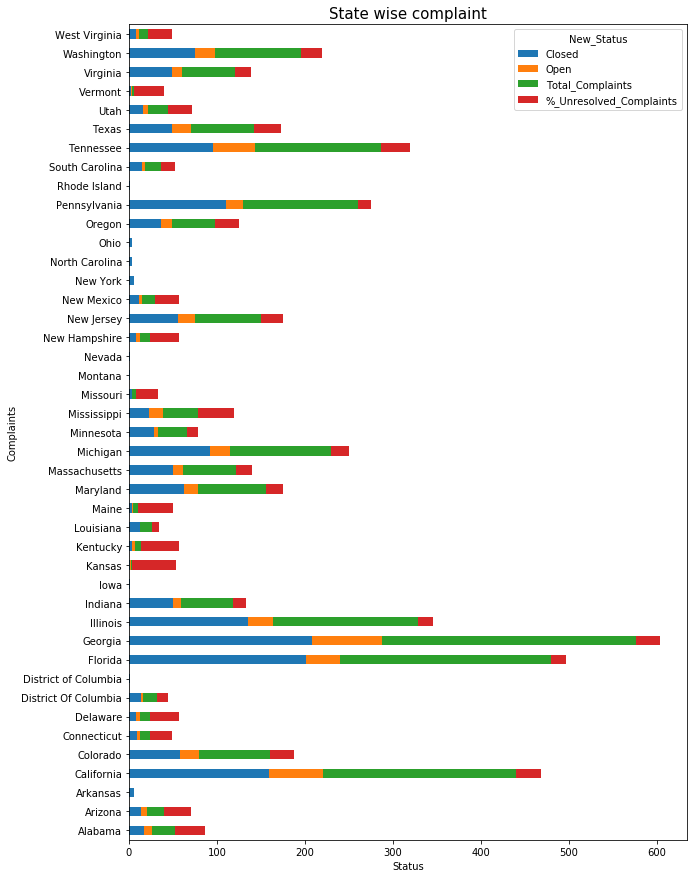

In [141]:
# state wise status of complaints in a stacked bar chart
state_wise_status.plot(kind = "barh", figsize = (10,15), stacked = True)
plt.title("State wise complaint", fontsize = 15) #plot title
plt.xlabel('Status',fontsize = 10) # plot x_label
plt.ylabel("Complaints",fontsize = 10) # plot y_label

Task.7 Which state has the highest percentage of unresolved complaints.

In [133]:
state_wise_status.head()

New_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0


In [134]:
# State that has highest percentage of unresolved complaints
state_wise_status["Total_Complaints"] = state_wise_status.Closed + state_wise_status.Open
state_wise_status["%_Unresolved_Complaints"] = (state_wise_status.Open/
                                                state_wise_status.Total_Complaints)*100
state_wise_status.head()

New_Status,Closed,Open,Total_Complaints,%_Unresolved_Complaints
State,,,,
Alabama,17.0,9.0,26.0,34.615385
Arizona,14.0,6.0,20.0,30.000000
Arkansas,6.0,NaN,NaN,NaN
California,159.0,61.0,220.0,27.727273
Colorado,58.0,22.0,80.0,27.500000


In [135]:
# fetching state that has highest %_Unresolved_Complaints
state_wise_status["%_Unresolved_Complaints"].idxmax()

'Kansas'

Kansas has highest percentage of unresolved complaints

In [136]:
# fetching highest %
state_wise_status["%_Unresolved_Complaints"].max()

50.0

Kansas has 50.00 percent of unresolved complaints

Task.8 Provide the percentage of complaints resolved till date,
which were received through the Internet and customer care calls.

In [137]:
data.groupby("Received_Via").size()

Received_Via
Customer Care Call    1119
Internet              1105
dtype: int64

Complaints received through the Internet and Customer care calls are 1119 and 1105 respectively

In [138]:
# fetching status based on mode of communication of the complaints
status_mode_of_comm = data.groupby(["Received_Via", "New_Status"]).size().unstack().reset_index()
status_mode_of_comm

New_Status,Received_Via,Closed,Open
0,Customer Care Call,864,255
1,Internet,843,262


In [139]:
# adding column - Total_Complaints
status_mode_of_comm["Total_Complaints"] = status_mode_of_comm.Closed + status_mode_of_comm.Open
status_mode_of_comm

New_Status,Received_Via,Closed,Open,Total_Complaints
0,Customer Care Call,864,255,1119
1,Internet,843,262,1105


In [140]:
# calculating percentage of complaints resolved till date

status_mode_of_comm["%_resolved_complaints"] = (status_mode_of_comm.Closed/
                                                status_mode_of_comm.Total_Complaints)*100
status_mode_of_comm

New_Status,Received_Via,Closed,Open,Total_Complaints,%_resolved_complaints
0,Customer Care Call,864,255,1119,77.211796
1,Internet,843,262,1105,76.289593


77.21 % of complaints are resolved that are received through customer care calls

76.28 % of complaints are resolved that are received through internet